In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:60% !important; }</style>"))

### The Diffusion Equation

In order to adequately describe a system of diffusing particles, we need to specify the density of particles at each point in space and how that density changes with time. In more mathematical terms, we must specify the surface $\rho(x,t)$ which $x$ is an arbitrary dimension of space. This surface can be found by solving the *diffusion equation*, a partial differential equation that relates the time derivative of the density of particles to the second spatial derivative of the density: 

\begin{align}
\frac{\partial\rho}{\partial t} = D\frac{\partial^{2}\rho}{\partial x^{2}}
\end{align}

where $D$ is the so-called diffusion coefficient. In Einstein's paper on Brownian motion, he showed that a solution to the diffusion equation was: 

\begin{align}
\rho (x,t) = \frac{1}{\sqrt{4\pi Dt}}\exp{\frac{-x^{2}}{4Dt}}
\end{align}

which can be confirmed by plugging in $\rho(t)$ to both sides of the diffusion equation. Let's take a look at the time dependence of this distribution:

The integral is: 1.0
The integral is: 1.0
The integral is: 1.0
The integral is: 1.0
The integral is: 1.0
The integral is: 1.0
The integral is: 1.0
The integral is: 1.0
The integral is: 1.0
The integral is: 1.0


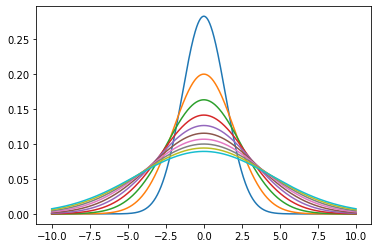

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

def gaussian(x, t, D=1): 
    a = 1/np.sqrt(4*np.pi*D*t)
    return a*np.exp(-(x**2)/(4*D*t))


D = 1
x = np.linspace(-10, 10, 1000)
t = np.linspace(1, 10, 10)

for t_i in t:
    g = gaussian(x, t_i, D)
    plt.plot(x,g)
    int_params = quad(gaussian, -np.inf, np.inf, args=(t_i, D))
    print('The integral is: %s' % str(round(int_params[0], 2)))
    
plt.show()

### Brownian MSD

Furthermore, the mean squared displacement (MSD) could be derived from this result by first starting with the definition of MSD: 

\begin{align}
\mathbf{MSD(t)} = \langle (x - x_{0})^{2} \rangle
\end{align}

if we expand this definition we have: 

\begin{align}
\mathbf{MSD(t)} = \langle x^{2} \rangle + \langle x_{0}^{2} \rangle - 2x_{0}\langle x \rangle
\end{align}

Assuming $x_{0} = 0$, we can simply calculate $\langle x^{2} \rangle$ and $\langle x \rangle$, and we will be left with an analytical expression for the MSD for a particle undergoing Brownian motion. Let's start with $\langle x^{2} \rangle$: 

\begin{align}
\langle x^{2} \rangle = \frac{1}{\sqrt{4\pi Dt}}\int_{-\infty}^{+\infty} x^{2}\exp{\frac{-x^{2}}{4Dt}}dx
\end{align}

It can be shown that a general solution to an equation of this form is: 

\begin{align}
\int_{-\infty}^{+\infty} x^{2}\exp{-sx^{2}}dx = \frac{\sqrt{\pi}}{2}s^{\frac{-3}{2}}
\end{align}

Utilizing that result, we see that the solution for our case is: 

\begin{align}
\langle x^{2} \rangle = \frac{\sqrt{\pi}}{2}\frac{(4Dt)^{\frac{-3}{2}}}{(4\pi Dt)^{\frac{1}{2}}} = 2Dt
\end{align}

In the end, we are left with the following expression for the MSD: 

\begin{align}
\mathbf{MSD(t)} = 2Dt
\end{align}

### Brownian MSD with Drift

The probability distribution for particle position in the presence of brownian motion + drift is the first case we will see where the MSD is not a linear function of time. Drift is defined as translation at a constant velocity which means the distribution is no longer centered around $x = 0$ for all $t$. Rather, the distribution is centered around the position $vt$ where $v$ is the drift velocity. The modified distribution looks like this: 

\begin{align}
\rho (x,t) = \frac{1}{\sqrt{4\pi Dt}}\exp{\frac{-(x-vt)^{2}}{4Dt}}
\end{align}

The integral is: 1.0
The integral is: 1.0
The integral is: 1.0
The integral is: 1.0
The integral is: 1.0
The integral is: 1.0
The integral is: 1.0
The integral is: 1.0
The integral is: 1.0
The integral is: 1.0


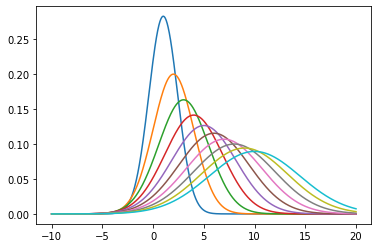

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def gaussian(x, t, D=1): 
    a = 1/np.sqrt(4*np.pi*D*t)
    return a*np.exp(-(x**2)/(4*D*t))

D = 1; v = 1
x = np.linspace(-10, 20, 1000)
t = np.linspace(1, 10, 10)

for t_i in t:
    g = gaussian(x-v*t_i, t_i, D)
    plt.plot(x,g)
    int_params = quad(gaussian, -np.inf, np.inf, args=(t_i, D))
    print('The integral is: %s' % str(round(int_params[0], 2)))

plt.show()

Clearly, the distribution widens and translates to the right as time progresses. Now, if we once again calculate $\langle x^{2} \rangle$:

\begin{align}
\langle x^{2} \rangle = \frac{1}{\sqrt{4\pi Dt}}\int_{-\infty}^{+\infty} x^{2}\exp{\frac{-(x-vt)^{2}}{4Dt}}dx
\end{align}

If we make the substitution $u = x-vt$, we can rewrite the integral as: 

\begin{align}
\langle x^{2} \rangle = \frac{1}{\sqrt{4\pi Dt}}\int_{-\infty}^{+\infty} (u+vt)^{2}\exp{\frac{-u^{2}}{4Dt}}dx
\end{align}

If we expand out the $(u+vt)^{2}$ term, we will be left with three integrals. The first will be the same problem we solved above with a change of variables, the second will be zero (it is a product of even and odd functions), and the third integral $\frac{1}{\sqrt{4\pi Dt}}\int_{-\infty}^{+\infty} v^{2}t^{2}\exp{\frac{-u^{2}}{4Dt}}du = v^{2}t^{2}$ since the distribution is normalized. To summarize, in the presence of constant drift, the MSD has the form: 

\begin{align}
\mathbf{MSD(t)} = 2Dt + v^{2}t^{2}
\end{align}

Since it's not as obvious what this function looks like, let's plot it.

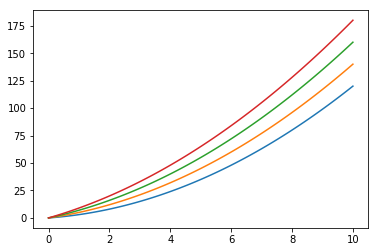

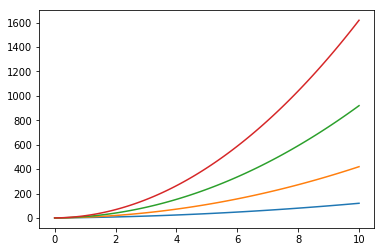

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def msd_drift(t, v_drift, diff_coeff): 
    return 2*diff_coeff*t + (v_drift**2)*(t**2)

t = np.linspace(0, 10, 100)
v_drifts = np.arange(1, 5, 1)
diff_coeffs = np.arange(1, 5, 1)

for diff_coeff in diff_coeffs: 
    plt.plot(t, msd_drift(t, v_drifts[0], diff_coeff))
plt.show()

for v_drift in v_drifts: 
    plt.plot(t, msd_drift(t, v_drift, diff_coeffs[0]))
plt.show()

### Anomalous Diffusion

Another scenario where the MSD is not a linear function of time is the case of *anomolous diffusion*. There are two main types of anomolous diffusion: sub-diffusion and super-diffusion. Sub-diffusion is frequently observed when studying crowded systems - a common definition is the tendency of particles not to diffuse due to random trapping. Super-diffusion, on the other hand, occurs when a particle randomly takes very long steps. The mathematics behind anomalous diffusion requires quite a bit of context and in some cases doesn't exist. For this reason, most experimentalists use the fact that $MSD \propto Dt^{\alpha}$ where $\alpha$ is a constant. Thus, the MSD is a power law function of time where sub-diffusion occurs when $\alpha < 1$, brownian motion is the case that $\alpha = 1$ and super-diffusion occurs when $\alpha > 1$. 

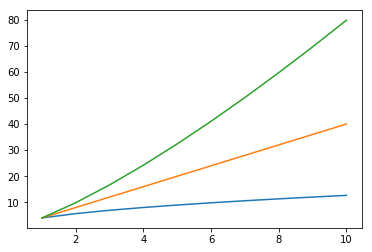

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def anom_msd(t, alpha): 
    return 4*D*t**alpha

alphas = [0.5, 1, 1.3]
t = np.linspace(1, 10, 10)

for alpha in alphas:
    plt.plot(t, anom_msd(t, alpha))
